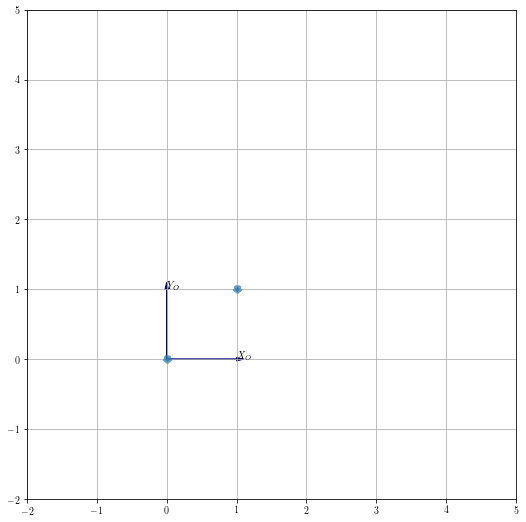

In [2]:
%matplotlib inline  
import sympy
from frames import Frame, TransformationTree, round_expr
sympy.init_printing()
    
tt = TransformationTree()
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 0, "*")


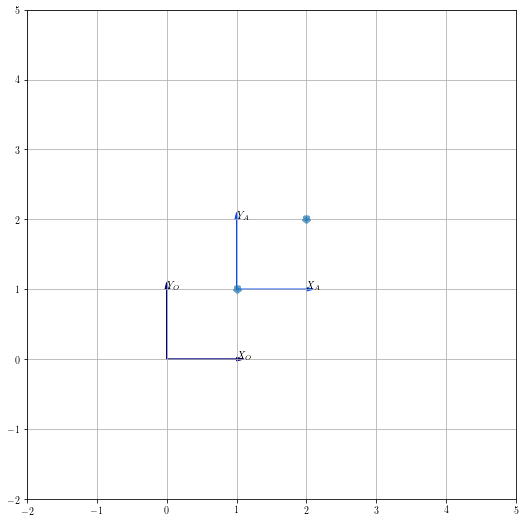

In [3]:
tt = TransformationTree()
A = Frame("A", transf="transl(1,1,0)", parent=tt.root)
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 1, "*")

Point w.r.t. origin frame:


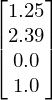

Transformation:


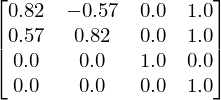

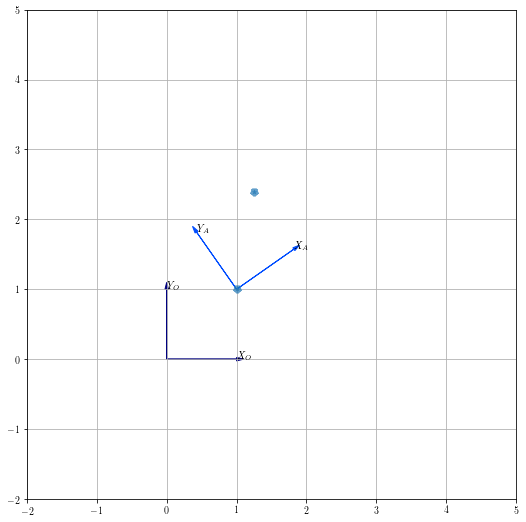

In [4]:
tt = TransformationTree()
A = Frame("A", transf="transl(1,1,0)*rotz(35)", parent=tt.root)
ax, frames = tt.plot_frames()
p = tt.plotInFrame([1,1,0,1], ax, 1, "*")
print "Point w.r.t. origin frame:"
display(round_expr(p[1]))
print "Transformation:"
display(round_expr(A.T))

O(identity())
└── A(rotz(45))


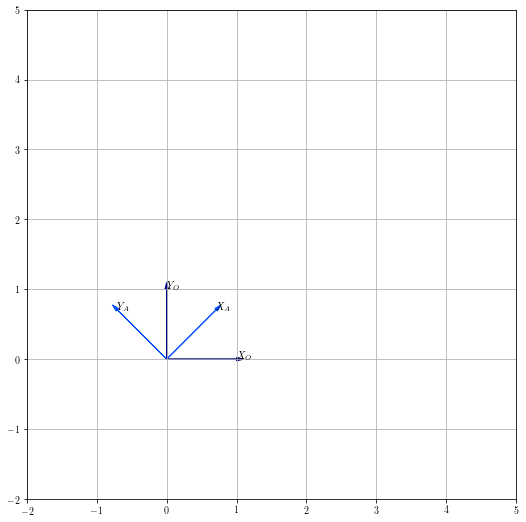

In [5]:
tt = TransformationTree()
A = Frame("A", transf="rotz(45)", parent=tt.root)

print tt

ax, frames = tt.plot_frames()

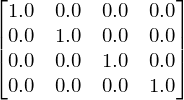

In [6]:
display(round_expr(tt.root.T))

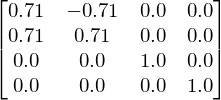

In [7]:
display(round_expr(A.T))

O(identity())
└── A(rotz(45))
    └── A(transl(0,1,0))


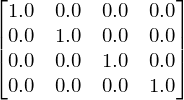

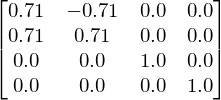

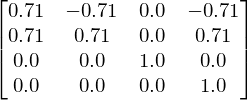

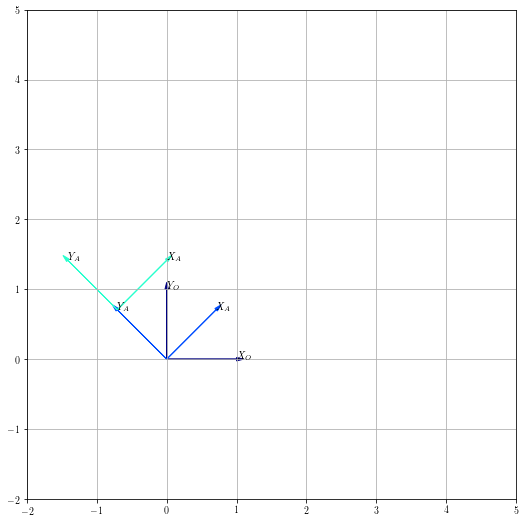

In [8]:
tt = TransformationTree()
A = Frame("A", transf="rotz(45)", parent=tt.root)
B = Frame("A", transf="transl(0,1,0)", parent=A)

print tt

ax, frames = tt.plot_frames()

display(round_expr(tt.Hs[0]))
display(round_expr(tt.Hs[1]))
display(round_expr(tt.Hs[2]))

Matrix multiplication do not commute!

O(identity())
└── A1(rotz(45))
    └── B1(transl(2,1,0))
O(identity())
└── B2(transl(2,1,0))
    └── A2(rotz(45))


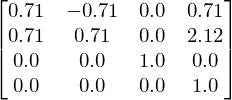

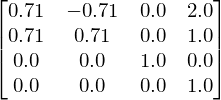

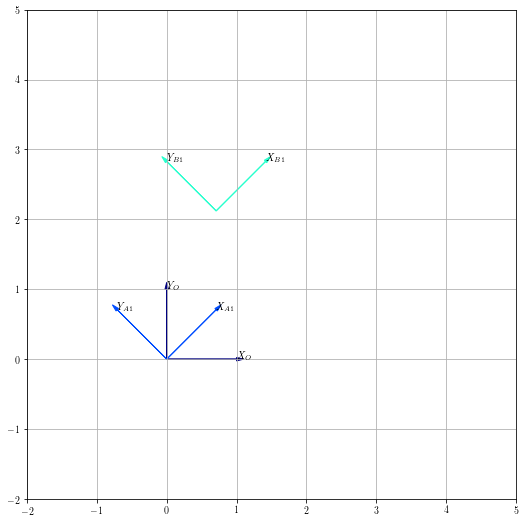

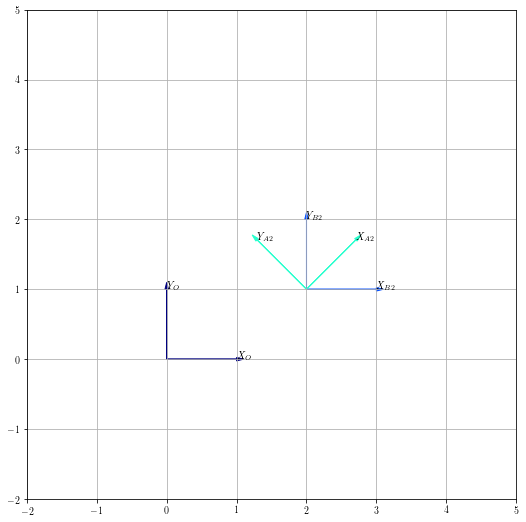

In [9]:
tt1 = TransformationTree()
A1 = Frame("A1", transf="rotz(45)", parent=tt1.root)
B1 = Frame("B1", transf="transl(2,1,0)", parent=A1)

tt2 = TransformationTree()
B2 = Frame("B2", transf="transl(2,1,0)", parent=tt2.root)
A2 = Frame("A2", transf="rotz(45)", parent=B2)

print tt1
print tt2

ax, frames = tt1.plot_frames()
display(round_expr(tt1.Hs[2]))

ax, frames = tt2.plot_frames()
display(round_expr(tt2.Hs[2]))


We can now use what we have learnt so far to describe a robot arm

O(identity())
└── l0(rotz(45.0))
    └── l1(transl(1.0,.0,.0)*rotz(-10.0))
        └── l2(transl(2.0,.0,.0)*rotz(10.0))


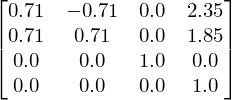

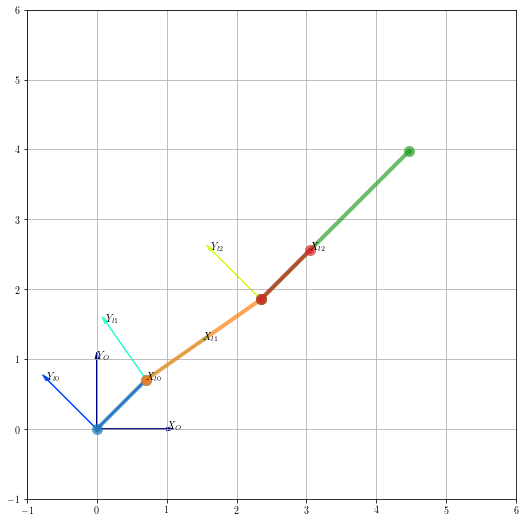

In [10]:
from links import MultiLink

l1 = 1.0; a1 = 45.0
l2 = 2.0; a2 = -10.0
l3 = 3.0; a3 = 10.0
arm = MultiLink()
link1 = arm.addLink(l1, a1)
link2 = arm.addLink(l2, a2)
link3 = arm.addLink(l3, a3)
print arm.tt

arm.plotLinks()

round_expr(arm.tt.Hs[-1])

In [11]:
tt = TransformationTree()
A = Frame("A", transf="rotz(s:alpha)", parent=tt.root)


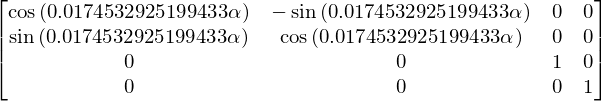

In [12]:
display(A.T)

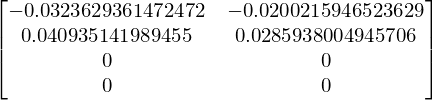

In [13]:
import frames
import sympy as sp
arm2 = MultiLink()
a2l1 = arm2.addLink("s:L1", "s:alpha")
a2l2 = arm2.addLink("s:L2", "s:beta")
arm2.compose("alpha","beta")

#print arm2.tt
#print arm2.H_eff 
Js = arm2.J.copy().subs({
      frames.SYMB("alpha"):45.0, 
      frames.SYMB("beta"):-10, 
      frames.SYMB("L1"):1.0, 
      frames.SYMB("L2"):1.0})
#print arm2.J
display(Js.evalf())

In [14]:
Ji = Js
Ji.inv()

NonSquareMatrixError: 

In [15]:
N = Ji.H * (Ji * Ji.H) ** -1

ValueError: Matrix det == 0; not invertible.

In [19]:
Ji.rank()